# Класифікація обʼєктів новобудови за текстовим описом за допомогою зворотної нейронної мережі

https://www.youtube.com/watch?v=VtRLrQ3Ev-U&ab_channel=freeCodeCamp.org

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
# from keras.losses import BinaryCrossentropy
from keras.losses import CategoricalCrossentropy
from sklearn.model_selection import train_test_split

## Завантаження набору даних

In [141]:
df = pd.read_csv('./translated-1677270280197.csv', usecols=['residence', 'developer', 'price', 'attributes/class', 'description'])

In [142]:
df.head()

,residence,developer,attributes/class,description,price
0,ЖК Greenville на Печерську,Greenville,бізнес,Greenville is a combination of residential spa...,4138800.0
1,Linden Luxury Residences,Budhouse Group,преміум,The location of Linden Luxury Residences is th...,1709400.0
2,БФК OLEGIVSKIY,DIM,бізнес,OLEGIVSKIY is an exclusive business class mult...,3856325.0
3,ЖК Новий Автограф,DIM,комфорт,"Between both buildings of the ""New Autograph"" ...",3269700.0
4,NaN,NaN,NaN,NaN,NaN


In [143]:
df.shape

(100, 5)

In [144]:
df = df.dropna(subset=['attributes/class', 'description'])

In [145]:
df['attributes/class'].unique()

array(['бізнес', 'преміум', 'комфорт', 'економ'], dtype=object)

In [146]:
df.head()

,residence,developer,attributes/class,description,price
0,ЖК Greenville на Печерську,Greenville,бізнес,Greenville is a combination of residential spa...,4138800.0
1,Linden Luxury Residences,Budhouse Group,преміум,The location of Linden Luxury Residences is th...,1709400.0
2,БФК OLEGIVSKIY,DIM,бізнес,OLEGIVSKIY is an exclusive business class mult...,3856325.0
3,ЖК Новий Автограф,DIM,комфорт,"Between both buildings of the ""New Autograph"" ...",3269700.0
5,БФК А136 Highlight Tower,DIM,бізнес,Residential complex A136 Highlight Tower is a ...,6635250.0


In [147]:
class_to_num_map = { 'бізнес': 0, 'преміум': 1, 'комфорт': 2, 'економ': 3 }

df['class'] = df['attributes/class'].map(class_to_num_map)

In [148]:
df = df[['description', 'class']]

In [149]:
df.head()

,description,class
0,Greenville is a combination of residential spa...,0
1,The location of Linden Luxury Residences is th...,1
2,OLEGIVSKIY is an exclusive business class mult...,0
3,"Between both buildings of the ""New Autograph"" ...",2
5,Residential complex A136 Highlight Tower is a ...,0


## Підготовка даних для тренування моделі

### Переведення міток до категоріальних значень

Так як мітки в даному випадку варіюються від 1 до 4 що вказує на певний клас будівлі, для того щоб повʼязати ці числа із виходом із softmax вихідного шару нейронної мережі, потрібно перевести числа до категоріального виду використовуюючи допоміжні функції keras.

### Створення сету характеристик і міток

TODO: використання imblearn.oversampling -> RandomOverSampler для прирівнювання к-сті зразків певного класу

In [150]:
train, val, test = np.split(df.sample(frac=1), [int(0.8 * len(df)), int(0.9 * len(df))])

In [151]:
train.shape, val.shape, test.shape

((70, 2), (9, 2), (9, 2))

In [152]:
df.head()

,description,class
0,Greenville is a combination of residential spa...,0
1,The location of Linden Luxury Residences is th...,1
2,OLEGIVSKIY is an exclusive business class mult...,0
3,"Between both buildings of the ""New Autograph"" ...",2
5,Residential complex A136 Highlight Tower is a ...,0


In [170]:
x_train = train['description'].values
y_train = to_categorical(train['class'], 4)

x_valid = val['description'].values
y_valid = to_categorical(val['class'], 4)

x_test = test['description'].values
y_test = to_categorical(test['class'], 4)

x_pred = ['There is nothing good in this residential complex, please omit it']
y_pred = to_categorical([0], 4)

### Композиція моделі

In [156]:
model = Sequential()

model.add(hub_layer)
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [157]:
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [158]:
model.evaluate(x_train, y_train)

3/3 [==============================] - 1s 126ms/step - loss: 1.3797 - accuracy: 0.2286


[1.3797121047973633, 0.22857142984867096]

In [159]:
history = model.fit(x=x_train, y=y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
3/3 [==============================] - 3s 746ms/step - loss: 1.3568 - accuracy: 0.3000 - val_loss: 1.4412 - val_accuracy: 0.2222
Epoch 2/10
3/3 [==============================] - 2s 724ms/step - loss: 1.2401 - accuracy: 0.5571 - val_loss: 1.4184 - val_accuracy: 0.4444
Epoch 3/10
3/3 [==============================] - 2s 750ms/step - loss: 1.1575 - accuracy: 0.6429 - val_loss: 1.3901 - val_accuracy: 0.4444
Epoch 4/10
3/3 [==============================] - 2s 731ms/step - loss: 1.0888 - accuracy: 0.6429 - val_loss: 1.3743 - val_accuracy: 0.4444
Epoch 5/10
3/3 [==============================] - 2s 715ms/step - loss: 1.0204 - accuracy: 0.6286 - val_loss: 1.3518 - val_accuracy: 0.4444
Epoch 6/10
3/3 [==============================] - 2s 737ms/step - loss: 0.9655 - accuracy: 0.6286 - val_loss: 1.3322 - val_accuracy: 0.4444
Epoch 7/10
3/3 [==============================] - 2s 728ms/step - loss: 0.9118 - accuracy: 0.6286 - val_loss: 1.3175 - val_accuracy: 0.4444
Epoch 8/10
3/3 [====

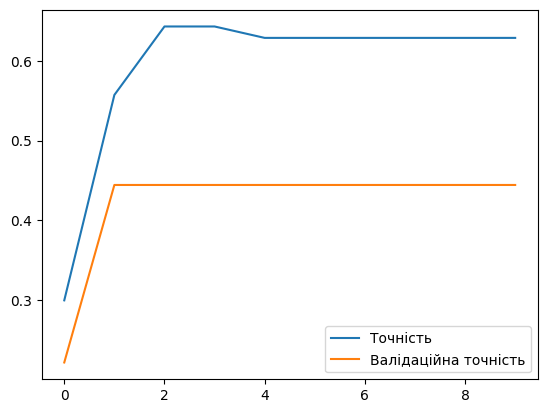

In [160]:
plt.plot(history.history['accuracy'], label="Точність")
plt.plot(history.history['val_accuracy'], label="Валідаційна точність")
plt.legend()

plt.show()

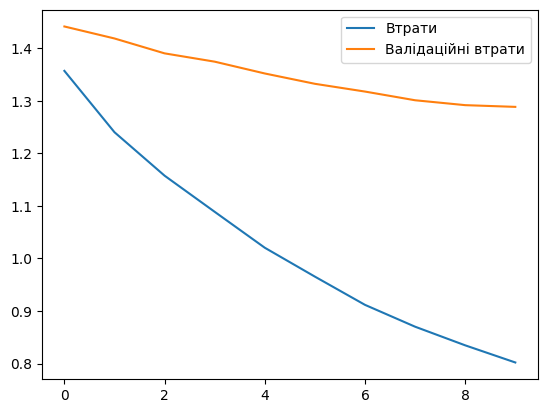

In [161]:
plt.plot(history.history['loss'], label="Втрати")
plt.plot(history.history['val_loss'], label="Валідаційні втрати")
plt.legend()

plt.show()

## Перевірка моделі на тестових даних яких раніше модель не бачила

In [164]:
def pred_to_text(pred):
    return list(class_to_num_map.keys())[list(class_to_num_map.values()).index(pred)]

In [165]:
pred_to_text(0), pred_to_text(1), pred_to_text(2), pred_to_text(3)

('бізнес', 'преміум', 'комфорт', 'економ')

In [162]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 137ms/step - loss: 0.9388 - accuracy: 0.6667


[0.9387757778167725, 0.6666666865348816]

In [172]:
pred = model.predict(x_pred)
pred_index = np.argmax(pred)

pred_to_text(pred_index)

1/1 [==============================] - 0s 148ms/step


'преміум'

TODO: also use LSTM https://www.youtube.com/watch?v=VtRLrQ3Ev-U&ab_channel=freeCodeCamp.org